# Plot results

In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Load the results data
with open('results.json', 'r') as f:
    results_data = json.load(f)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(results_data).T
df.reset_index(inplace=True)
df.rename(columns={'index': 'Agent'}, inplace=True)

In [ ]:
df

,Agent,execution_time,token_usage
0,Baseline ReAct Agent,53.70,64542.0
1,Reduced Context Agent,69.25,36869.0
2,Structured Schema Agent,66.42,23644.0
3,Mitigation Plan Agent,164.81,62595.0
4,Mitigation Plan Agent with RAG (new incident),401.73,120741.0
5,Mitigation Plan Agent with RAG (already happened),215.81,84177.0


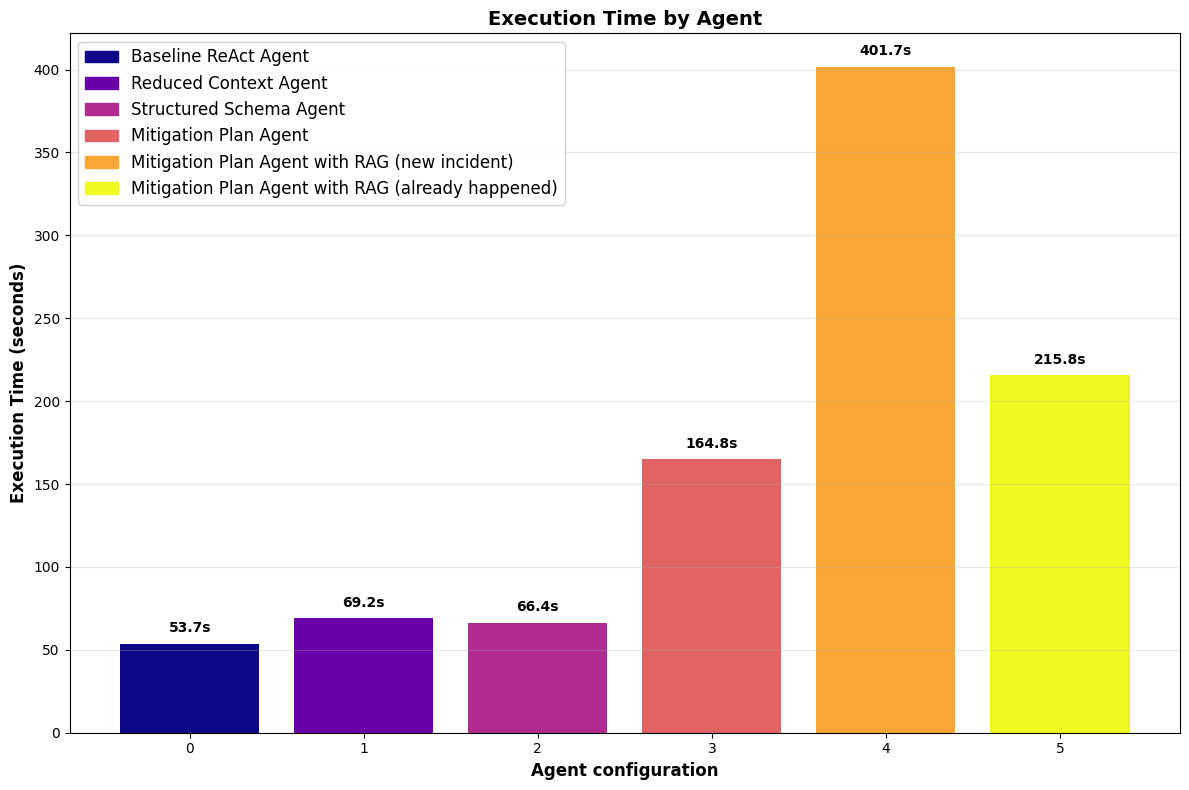

In [34]:

# Plot 1: Execution Time Bar Chart
plt.figure(figsize=(12, 8))
colors = plt.cm.plasma(np.linspace(0, 1, len(df)))
bars = plt.bar(range(len(df)), df['execution_time'], color=colors)

plt.xlabel('Agent configuration', fontweight='bold', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
plt.title('Execution Time by Agent', fontweight='bold', fontsize=14)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}s', ha='center', va='bottom', fontweight='bold')

# Create legend positioned in upper left corner inside the plot
legend_elements = [plt.Rectangle((0,0),1,1, color=colors[i], label=agent) 
                  for i, agent in enumerate(df['Agent'])]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12, framealpha=0.9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('execution_time_plot.pdf', bbox_inches='tight', dpi=300)
plt.show()

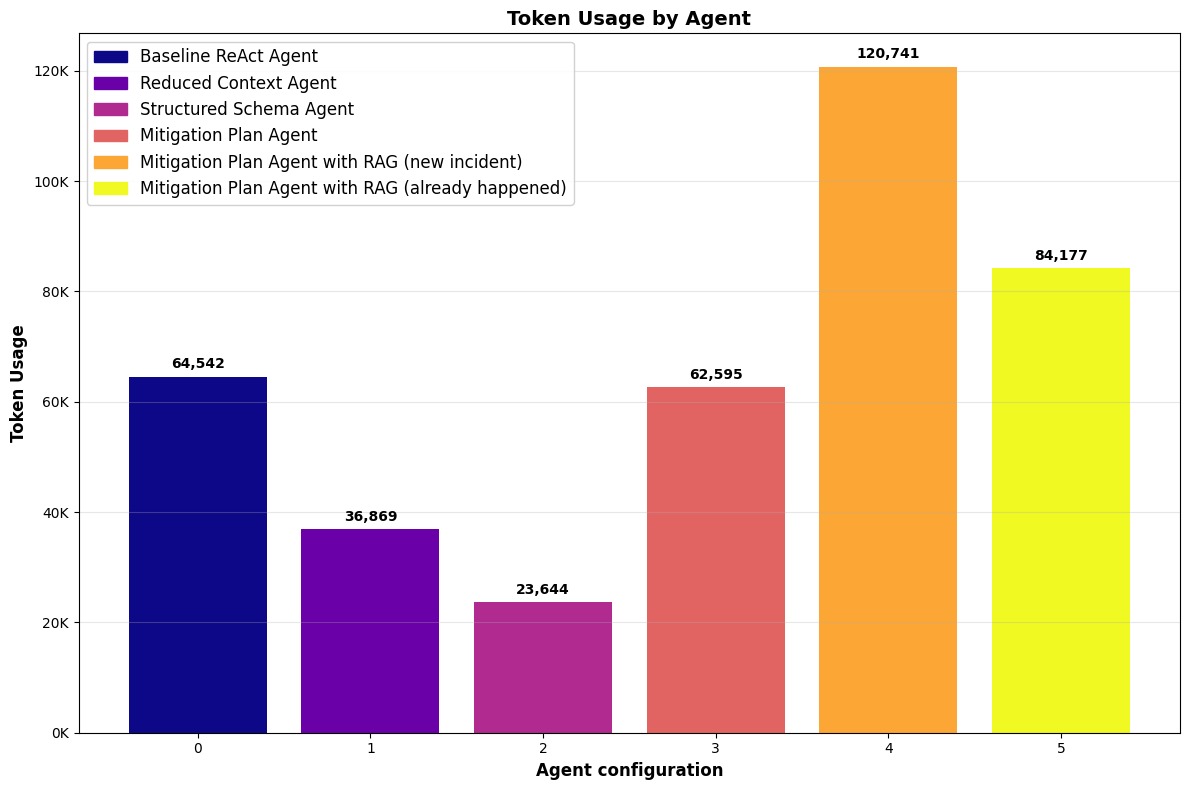

In [35]:
# Plot 2: Token Usage Bar Chart
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(df)), df['token_usage'], color=colors)

plt.xlabel('Agent configuration', fontweight='bold', fontsize=12)
plt.ylabel('Token Usage', fontweight='bold', fontsize=12)
plt.title('Token Usage by Agent', fontweight='bold', fontsize=14)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Create legend positioned in upper left corner inside the plot
legend_elements = [plt.Rectangle((0,0),1,1, color=colors[i], label=agent) 
                  for i, agent in enumerate(df['Agent'])]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12, framealpha=0.9)

plt.grid(axis='y', alpha=0.3)
# Format y-axis to show thousands with K suffix
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
plt.tight_layout()
plt.savefig('token_usage_plot.pdf', dpi=300)
plt.show()

/var/folders/d8/_kx0rmj95w396l9pjb3kf4qc0000gn/T/ipykernel_11460/4175732142.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_elements = [plt.scatter([], [], c=colors[i], s=150, alpha=0.8, edgecolors='black', label=agent)


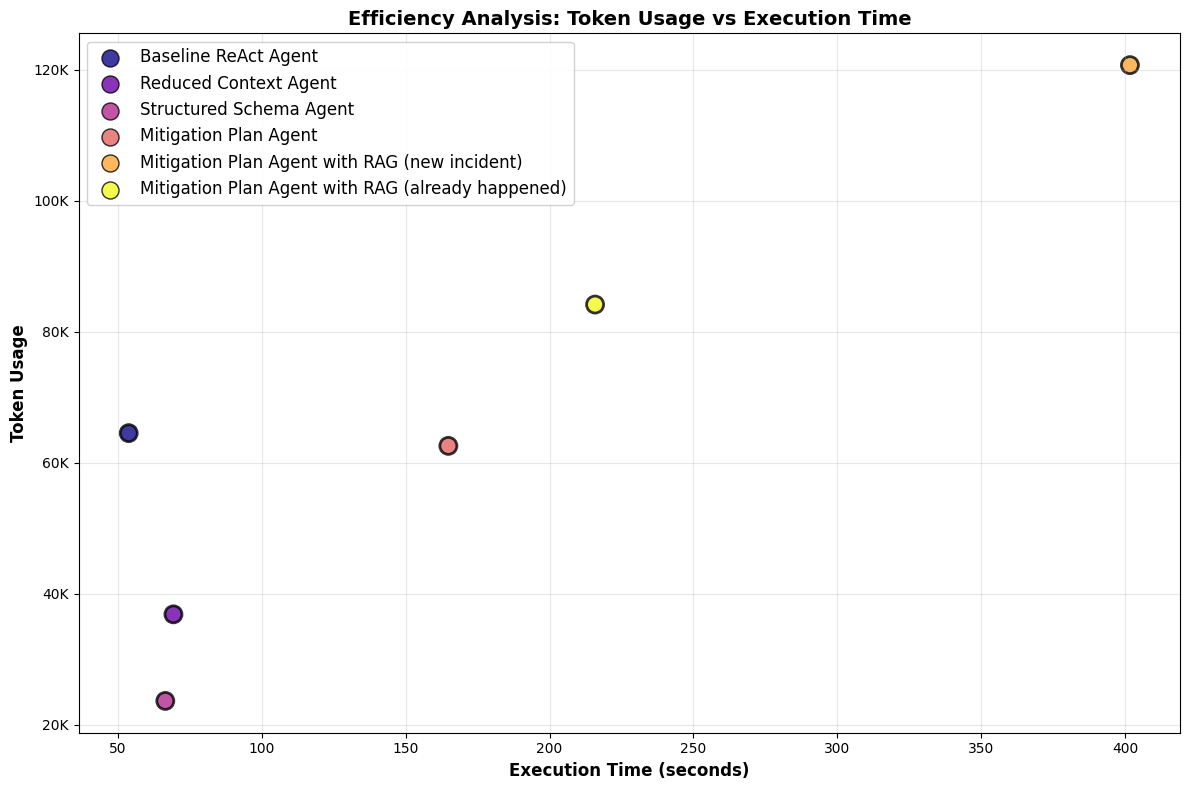

In [36]:
# Plot 3: Efficiency Scatter Plot (Token Usage vs Execution Time)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['execution_time'], df['token_usage'], 
                     c=colors, s=150, alpha=0.8, edgecolors='black', linewidths=2)

plt.xlabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
plt.ylabel('Token Usage', fontweight='bold', fontsize=12)
plt.title('Efficiency Analysis: Token Usage vs Execution Time', fontweight='bold', fontsize=14)

# Create legend with agent names positioned in upper left corner inside the plot
legend_elements = [plt.scatter([], [], c=colors[i], s=150, alpha=0.8, edgecolors='black', label=agent)
                  for i, agent in enumerate(df['Agent'])]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12, framealpha=0.9)

plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
plt.tight_layout()
plt.savefig('efficiency_scatter_plot.pdf', dpi=300)
plt.show()

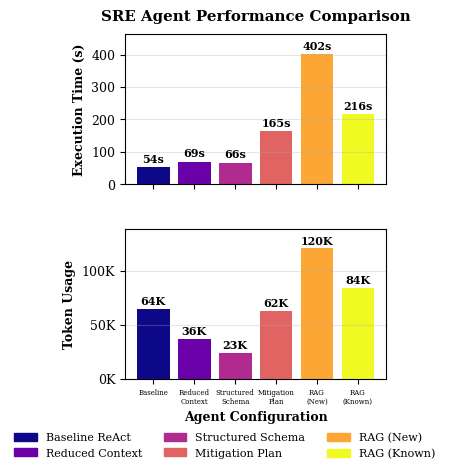

In [54]:
# Combined Plot for Paper: Execution Time and Token Usage (Vertical Layout)
# Optimized for double-column paper format 
plt.rcParams.update({'font.size': 9, 'font.family': 'serif'})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.5, 4.5))
colors = plt.cm.plasma(np.linspace(0, 1, len(df)))

# Shortened agent names for better readability
short_names = ['Baseline', 'Reduced\nContext', 'Structured\nSchema', 
               'Mitigation\nPlan', 'RAG\n(New)', 'RAG\n(Known)']

# Plot 1: Execution Time (Top)
bars1 = ax1.bar(range(len(df)), df['execution_time'], color=colors, width=0.8)
ax1.set_ylabel('Execution Time (s)', fontweight='bold')
ax1.set_title('SRE Agent Performance Comparison', fontweight='bold', pad=10)

# Add value labels on bars (execution time)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 8,
             f'{height:.0f}s', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax1.grid(axis='y', alpha=0.3)
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels([])  # Remove x-axis labels for top plot
ax1.set_ylim(0, max(df['execution_time']) * 1.15)

# Plot 2: Token Usage (Bottom)
bars2 = ax2.bar(range(len(df)), df['token_usage'], color=colors, width=0.8)
ax2.set_xlabel('Agent Configuration', fontweight='bold')
ax2.set_ylabel('Token Usage', fontweight='bold')

# Add value labels on bars (token usage)
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2000,
             f'{int(height/1000)}K', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax2.grid(axis='y', alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Set x-axis labels for bottom plot
ax2.set_xticks(range(len(df)))
ax2.set_xticklabels(short_names, fontsize=5, ha='center')
ax2.set_ylim(0, max(df['token_usage']) * 1.15)

# Create a more compact legend below the plots
legend_labels = [
    'Baseline ReAct',
    'Reduced Context', 
    'Structured Schema',
    'Mitigation Plan',
    'RAG (New)',
    'RAG (Known)'
]

legend_elements = [plt.Rectangle((0,0),1,1, color=colors[i], label=legend_labels[i]) 
                  for i in range(len(df))]

# Position legend below the bottom plot
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
           ncol=3, fontsize=8, frameon=False)

# Adjust layout with more space at bottom for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, hspace=0.3)

# Save as high-resolution PDF for paper
plt.savefig('sre_agent_performance_paper.pdf', bbox_inches='tight', dpi=300, 
           facecolor='white', edgecolor='none', pad_inches=0.1)
plt.show()